# Plotting heatmap of the computational cost and errors

## Import libraries

In [1]:
# %matplotlib notebook
#  add Python-loader repo to the path 
import sys
sys.path.insert(0, '../Python-loader/')
from pyMCDS import pyMCDS

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
from scipy.integrate import odeint

## Define cell cycle model

In [18]:
# CELL CYCLE MODELS
### advanced_Ki67_cycle_model = 0
### basic_Ki67_cycle_model = 1
### flow_cytometry_cycle_model = 2
### live_apoptotic_cycle_model = 3
### total_cells_cycle_model = 4
### live_cells_cycle_model = 5 
### flow_cytometry_separated_cycle_model = 6
### cycling_quiescent_model = 7
cycle_model = 6

output_folder = "output_Experimental_Settings_R300/"

## Define experimental settings

In [19]:
num_folders = 18
num_params = 3

settings = np.zeros((num_folders, num_params))
settings[0,:] = np.array([6, 100, 10])
settings[1,:] = np.array([6, 100, 20])
settings[2,:] = np.array([6, 100, 50])
settings[3,:] = np.array([6, 100, 100])
settings[4,:] = np.array([6, 100, 200])
settings[5,:] = np.array([6, 100, 300])
settings[6,:] = np.array([6, 500, 10])
settings[7,:] = np.array([6, 500, 20])
settings[8,:] = np.array([6, 500, 50])
settings[9,:] = np.array([6, 500, 100])
settings[10,:] = np.array([6, 500, 200])
settings[11,:] = np.array([6, 500, 300])
settings[12,:] = np.array([6, 1000, 10])
settings[13,:] = np.array([6, 1000, 20])
settings[14,:] = np.array([6, 1000, 50])
settings[15,:] = np.array([6, 1000, 100])
settings[16,:] = np.array([6, 1000, 200])
settings[17,:] = np.array([6, 1000, 300])

## Read *cost.csv* files

In [20]:
def get_folder_name(settings):
    if cycle_model == 0:
        folder_name = "output_Ki67_Advanced_"
    elif cycle_model == 1:
        folder_name = "output_Ki67_Basic_"
    elif cycle_model == 2:
        folder_name = "output_Flow_Cytometry_"
    elif cycle_model == 5:
        folder_name = "output_Live_"
    elif cycle_model == 6:
        folder_name = "output_Separated_Flow_Cytometry_"
    else:
        print("Unrecognized cell cycle model.")
    
    if settings[0].is_integer():
        folder_name += "dt" + str(int(settings[0])) + "_NC" + str(int(settings[1])) + "_R" + str(int(settings[2])) + "/"
    else:
        folder_name += "dt" + str(settings[0]) + "_NC" + str(int(settings[1])) + "_R" + str(int(settings[2])) + "/"
    
    return folder_name

In [21]:
data = [None] * num_folders
total_cost = [None] * num_folders
mean_total_cost = [None] * num_folders
phenotype_update_cost = [None] * num_folders
mean_phenotype_update_cost = [None] * num_folders

for i in range(num_folders):
    data[i] = np.genfromtxt(output_folder + get_folder_name(settings[i,:]) + "cost.csv", dtype = float, delimiter = ',', names = True)
    total_cost[i] = data[i]["total_cost"]
    mean_total_cost[i] = total_cost[i]/settings[i,2]
    phenotype_update_cost[i] = data[i]["phenotype_update_cost"]
    mean_phenotype_update_cost[i] = phenotype_update_cost[i]/settings[i,2]

## Plot heatmap of the computational cost

In [22]:
def heatmap(data, row_labels, col_labels, ax=None, cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (N, M).
    row_labels
        A list or array of length N with the labels for the rows.
    col_labels
        A list or array of length M with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    im_ratio = data.shape[0]/data.shape[1]
    cbar = ax.figure.colorbar(im, ax=ax, fraction=0.046*im_ratio, pad=0.04, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    # plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
    # 		 rotation_mode="anchor")

    # Turn spines off and create white grid.
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar

def annotate_heatmap(im, data=None, valfmt="{x:.2f}", textcolors=("black", "white"), threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A pair of colors.  The first is used for values below a threshold,
        the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            # kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

In [23]:
number_of_cells = np.unique(settings[:,1])
num_replicates = np.unique(settings[:,2])

number_of_cells_labels = number_of_cells.astype(int).astype(str)
num_replicates_labels = num_replicates.astype(int).astype(str)

total_cost = np.array(total_cost)
mean_total_cost = np.array(mean_total_cost)
phenotype_update_cost = np.array(phenotype_update_cost)
mean_phenotype_update_cost = np.array(mean_phenotype_update_cost)

total_cost = total_cost.reshape((len(number_of_cells), len(num_replicates)))
mean_total_cost = mean_total_cost.reshape((len(number_of_cells), len(num_replicates)))
phenotype_update_cost = phenotype_update_cost.reshape((len(number_of_cells), len(num_replicates)))
mean_phenotype_update_cost = mean_phenotype_update_cost.reshape((len(number_of_cells), len(num_replicates)))

total_cost = np.transpose(total_cost)
mean_total_cost = np.transpose(mean_total_cost)
phenotype_update_cost = np.transpose(phenotype_update_cost)
mean_phenotype_update_cost = np.transpose(mean_phenotype_update_cost)

<Figure size 432x288 with 0 Axes>

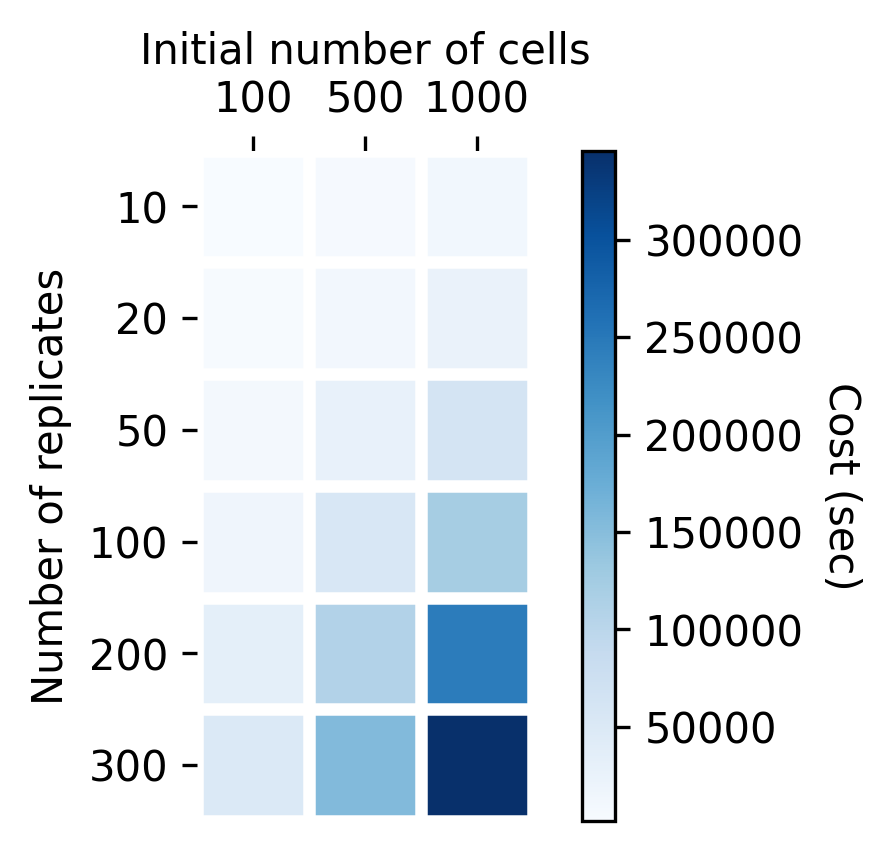

In [24]:
if cycle_model == 0:
    cell_cycle_model_filename = "Ki67_Advanced"
elif cycle_model == 1:
    cell_cycle_model_filename = "Ki67_Basic"
elif cycle_model == 2:
    cell_cycle_model_filename = "Flow_Cytometry"
elif cycle_model == 5:
    cell_cycle_model_filename = "Live"
elif cycle_model == 6:
    cell_cycle_model_filename = "Separated_Flow_Cytometry"
else:
    print("Unrecognized cell cycle model.")

plt.clf()
fig, ax = plt.subplots(1, 1, figsize = (5.27, 2.96), dpi = 300)
im, cbar = heatmap(total_cost, num_replicates_labels, number_of_cells_labels, ax=ax, cmap="Blues", cbarlabel="Cost (sec)")
# texts = annotate_heatmap(im, valfmt="{x:.0f}")

plt.xlabel( "Initial number of cells", size=10 )
ax.xaxis.set_label_position('top') 
plt.ylabel( "Number of replicates", size=10 )
plt.savefig(os.path.join(output_folder, cell_cycle_model_filename + "_cost.pdf"), bbox_inches = 'tight')

<Figure size 432x288 with 0 Axes>

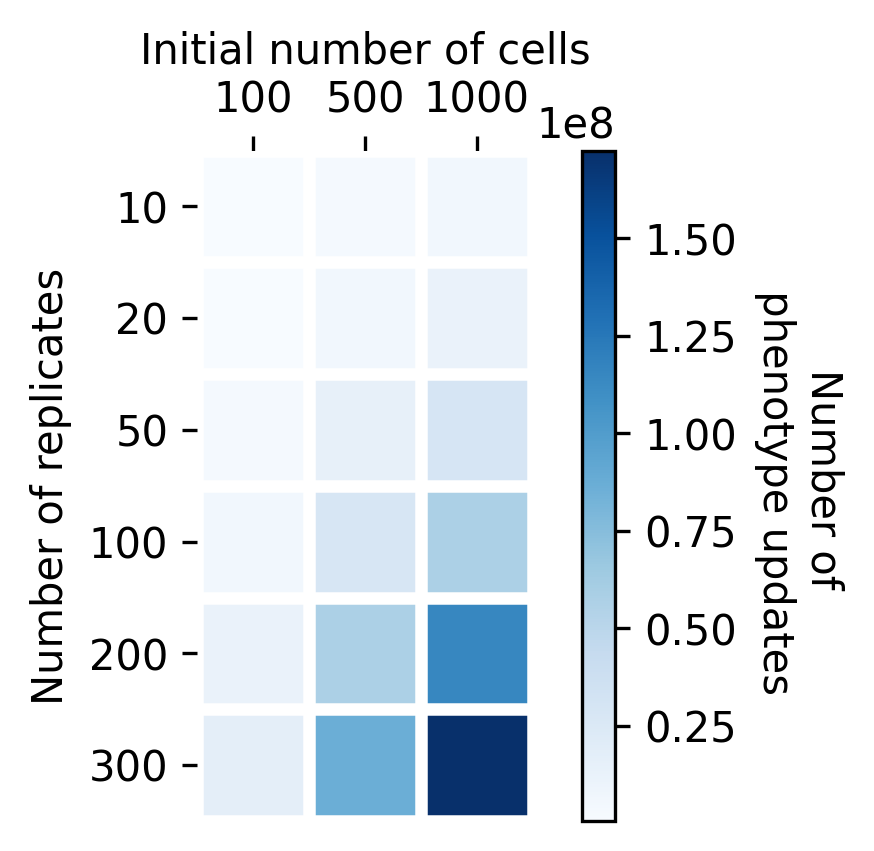

In [25]:
plt.clf()
fig, ax = plt.subplots(1, 1, figsize = (5.27, 2.96), dpi = 300)
im, cbar = heatmap(phenotype_update_cost, num_replicates_labels, number_of_cells_labels, ax=ax, cmap="Blues", cbarlabel='Number of \n phenotype updates')
# texts = annotate_heatmap(im, valfmt="{x:.1e}")

plt.xlabel( "Initial number of cells", size=10 )
ax.xaxis.set_label_position('top') 
plt.ylabel( "Number of replicates", size=10 )
plt.savefig(os.path.join(output_folder, cell_cycle_model_filename + "_phenotype_update_cost.pdf"), bbox_inches = 'tight')

## Read *csse.csv* files

In [26]:
data = [None] * num_folders
times = [None] * num_folders
if cycle_model == 0:
    Ki67_negative_csse = [None] * num_folders
    Ki67_positive_premitotic_csse = [None] * num_folders
    Ki67_positive_postmitotic_csse = [None] * num_folders
elif cycle_model == 1:
    Ki67_negative_csse = [None] * num_folders
    Ki67_positive_csse = [None] * num_folders
    
    # tumor_cell_fraction_error = [None] * num_folders
elif cycle_model == 2:
    G0G1_phase_csse = [None] * num_folders
    S_phase_csse = [None] * num_folders
    G2M_phase_csse = [None] * num_folders
elif cycle_model == 5:
    live_csse = [None] * num_folders
elif cycle_model == 6:
    G0G1_phase_csse = [None] * num_folders
    S_phase_csse = [None] * num_folders
    G2_phase_csse = [None] * num_folders
    M_phase_csse = [None] * num_folders
else:
    print("Unrecognized cell cycle model.")

for i in range(num_folders):
    data[i] = np.genfromtxt(output_folder + get_folder_name(settings[i,:]) + "csse.csv", dtype = float, delimiter = ',', names = True)
    times[i] = data[i]["times"][-1]
    if cycle_model == 0:
        Ki67_negative_csse[i] = data[i]["Ki67_negative_csse"][-1]
        Ki67_positive_premitotic_csse[i] = data[i]["Ki67_positive_premitotic_csse"][-1]
        Ki67_positive_postmitotic_csse[i] = data[i]["Ki67_positive_postmitotic_csse"][-1]
    elif cycle_model == 1:
        Ki67_negative_csse[i] = data[i]["Ki67_negative_csse"][-1]
        Ki67_positive_csse[i] = data[i]["Ki67_positive_csse"][-1]
        
        # tumor_cell_fraction_error[i] = data[i]["tumor_cell_fraction_error"][-1]
    elif cycle_model == 2:
        G0G1_phase_csse[i] = data[i]["G0G1_phase_csse"][-1]
        S_phase_csse[i] = data[i]["S_phase_csse"][-1]
        G2M_phase_csse[i] = data[i]["G2M_phase_csse"][-1]
    elif cycle_model == 5:
        live_csse[i] = data[i]["live_csse"][-1]
    elif cycle_model == 6:
        G0G1_phase_csse[i] = data[i]["G0G1_phase_csse"][-1]
        S_phase_csse[i] = data[i]["S_phase_csse"][-1]
        G2_phase_csse[i] = data[i]["G2_phase_csse"][-1]
        M_phase_csse[i] = data[i]["M_phase_csse"][-1]
    else:
        print("Unrecognized cell cycle model.")

## Plot heatmap for the errors

In [27]:
if cycle_model == 0:
    Ki67_negative_csse = np.array(Ki67_negative_csse)
    Ki67_positive_premitotic_csse = np.array(Ki67_positive_premitotic_csse)
    Ki67_positive_postmitotic_csse = np.array(Ki67_positive_postmitotic_csse)

    Ki67_negative_csse = Ki67_negative_csse.reshape((len(number_of_cells), len(num_replicates)))
    Ki67_positive_premitotic_csse = Ki67_positive_premitotic_csse.reshape((len(number_of_cells), len(num_replicates)))
    Ki67_positive_postmitotic_csse = Ki67_positive_postmitotic_csse.reshape((len(number_of_cells), len(num_replicates)))

    Ki67_negative_csse = np.transpose(Ki67_negative_csse)
    Ki67_positive_premitotic_csse = np.transpose(Ki67_positive_premitotic_csse)
    Ki67_positive_postmitotic_csse = np.transpose(Ki67_positive_postmitotic_csse)
elif cycle_model == 1:
    Ki67_negative_csse = np.array(Ki67_negative_csse)
    Ki67_positive_csse = np.array(Ki67_positive_csse)
    # tumor_cell_fraction_error = np.array(tumor_cell_fraction_error)

    Ki67_negative_csse = Ki67_negative_csse.reshape((len(number_of_cells), len(num_replicates)))
    Ki67_positive_csse = Ki67_positive_csse.reshape((len(number_of_cells), len(num_replicates)))
    # tumor_cell_fraction_error = tumor_cell_fraction_error.reshape((len(number_of_cells), len(num_replicates)))

    Ki67_negative_csse = np.transpose(Ki67_negative_csse)
    Ki67_positive_csse = np.transpose(Ki67_positive_csse)
    # tumor_cell_fraction_error = np.transpose(tumor_cell_fraction_error)
elif cycle_model == 2:
    G0G1_phase_csse = np.array(G0G1_phase_csse)
    S_phase_csse = np.array(S_phase_csse)
    G2M_phase_csse = np.array(G2M_phase_csse)

    G0G1_phase_csse = G0G1_phase_csse.reshape((len(number_of_cells), len(num_replicates)))
    S_phase_csse = S_phase_csse.reshape((len(number_of_cells), len(num_replicates)))
    G2M_phase_csse = G2M_phase_csse.reshape((len(number_of_cells), len(num_replicates)))

    G0G1_phase_csse = np.transpose(G0G1_phase_csse)
    S_phase_csse = np.transpose(S_phase_csse)
    G2M_phase_csse = np.transpose(G2M_phase_csse)
elif cycle_model == 5:
    live_csse = np.array(live_csse)

    live_csse = live_csse.reshape((len(number_of_cells), len(num_replicates)))

    live_csse = np.transpose(live_csse)
elif cycle_model == 6:
    G0G1_phase_csse = np.array(G0G1_phase_csse)
    S_phase_csse = np.array(S_phase_csse)
    G2_phase_csse = np.array(G2_phase_csse)
    M_phase_csse = np.array(M_phase_csse)

    G0G1_phase_csse = G0G1_phase_csse.reshape((len(number_of_cells), len(num_replicates)))
    S_phase_csse = S_phase_csse.reshape((len(number_of_cells), len(num_replicates)))
    G2_phase_csse = G2_phase_csse.reshape((len(number_of_cells), len(num_replicates)))
    M_phase_csse = M_phase_csse.reshape((len(number_of_cells), len(num_replicates)))

    G0G1_phase_csse = np.transpose(G0G1_phase_csse)
    S_phase_csse = np.transpose(S_phase_csse)
    G2_phase_csse = np.transpose(G2_phase_csse)
    M_phase_csse = np.transpose(M_phase_csse)
else:
    print("Unrecognized cell cycle model.")

<Figure size 432x288 with 0 Axes>

<Figure size 1581x888 with 0 Axes>

<Figure size 1581x888 with 0 Axes>

<Figure size 1581x888 with 0 Axes>

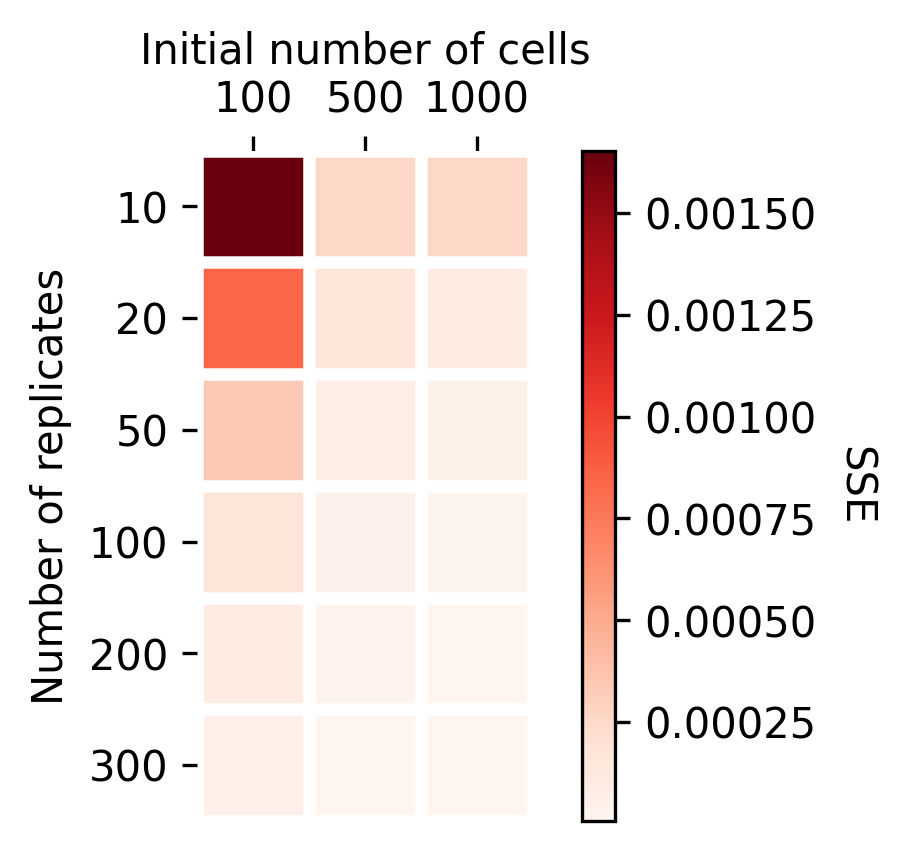

In [28]:
if cycle_model == 0:
    plt.clf()
    fig, ax = plt.subplots(1, 1, figsize = (5.27, 2.96), dpi = 300)
    im, cbar = heatmap(Ki67_negative_csse, num_replicates_labels, number_of_cells_labels, ax=ax, cmap="Reds", cbarlabel='SSE')
    # texts = annotate_heatmap(im, valfmt="{x:.4f}")

    plt.xlabel( "Initial number of cells", size=10 )
    ax.xaxis.set_label_position('top') 
    plt.ylabel( "Number of replicates", size=10 )
    plt.savefig(os.path.join(output_folder, "Ki67_neg_sse.pdf"), bbox_inches = 'tight')
    
    plt.clf()
    fig, ax = plt.subplots(1, 1, figsize = (5.27, 2.96), dpi = 300)
    im, cbar = heatmap(Ki67_positive_premitotic_csse, num_replicates_labels, number_of_cells_labels, ax=ax, cmap="Reds", cbarlabel='SSE')
    # texts = annotate_heatmap(im, valfmt="{x:.4f}")

    plt.xlabel( "Initial number of cells", size=10 )
    ax.xaxis.set_label_position('top') 
    plt.ylabel( "Number of replicates", size=10 )
    plt.savefig(os.path.join(output_folder, "Ki67_pos_pre_sse.pdf"), bbox_inches = 'tight')
    
    plt.clf()
    fig, ax = plt.subplots(1, 1, figsize = (5.27, 2.96), dpi = 300)
    im, cbar = heatmap(Ki67_positive_postmitotic_csse, num_replicates_labels, number_of_cells_labels, ax=ax, cmap="Reds", cbarlabel='SSE')
    # texts = annotate_heatmap(im, valfmt="{x:.4f}")

    plt.xlabel( "Initial number of cells", size=10 )
    ax.xaxis.set_label_position('top') 
    plt.ylabel( "Number of replicates", size=10 )
    plt.savefig(os.path.join(output_folder, "Ki67_pos_post_sse.pdf"), bbox_inches = 'tight')
elif cycle_model == 1:
    plt.clf()
    fig, ax = plt.subplots(1, 1, figsize = (5.27, 2.96), dpi = 300)
    im, cbar = heatmap(Ki67_negative_csse, num_replicates_labels, number_of_cells_labels, ax=ax, cmap="Reds", cbarlabel='SSE')
    # texts = annotate_heatmap(im, valfmt="{x:.4f}")

    plt.xlabel( "Initial number of cells", size=10 )
    ax.xaxis.set_label_position('top') 
    plt.ylabel( "Number of replicates", size=10 )
    plt.savefig(os.path.join(output_folder, "Ki67_neg_sse.pdf"), bbox_inches = 'tight')
    
    plt.clf()
    fig, ax = plt.subplots(1, 1, figsize = (5.27, 2.96), dpi = 300)
    im, cbar = heatmap(Ki67_positive_csse, num_replicates_labels, number_of_cells_labels, ax=ax, cmap="Reds", cbarlabel='SSE')
    # texts = annotate_heatmap(im, valfmt="{x:.4f}")

    plt.xlabel( "Initial number of cells", size=10 )
    ax.xaxis.set_label_position('top') 
    plt.ylabel( "Number of replicates", size=10 )
    plt.savefig(os.path.join(output_folder, "Ki67_pos_sse.pdf"), bbox_inches = 'tight')
    
    # plt.clf()
    # fig, ax = plt.subplots(1, 1, figsize = (5.27, 2.96), dpi = 300)
    # im, cbar = heatmap(tumor_cell_fraction_error, num_replicates_labels, number_of_cells_labels, ax=ax, cmap="Reds", cbarlabel='SSE')
    # # texts = annotate_heatmap(im, valfmt="{x:.4f}")

    # plt.xlabel( "Initial number of cells", size=10 )
    # ax.xaxis.set_label_position('top') 
    # plt.ylabel( "Number of replicates", size=10 )
    # plt.savefig(os.path.join(output_folder, "Ki67_Basic_sse.pdf"), bbox_inches = 'tight')
elif cycle_model == 2:
    plt.clf()
    fig, ax = plt.subplots(1, 1, figsize = (5.27, 2.96), dpi = 300)
    im, cbar = heatmap(G0G1_phase_csse, num_replicates_labels, number_of_cells_labels, ax=ax, cmap="Reds", cbarlabel='SSE')
    # texts = annotate_heatmap(im, valfmt="{x:.4f}")

    plt.xlabel( "Initial number of cells", size=10 )
    ax.xaxis.set_label_position('top') 
    plt.ylabel( "Number of replicates", size=10 )
    plt.savefig(os.path.join(output_folder, "G0G1_phase_sse.pdf"), bbox_inches = 'tight')
    
    plt.clf()
    fig, ax = plt.subplots(1, 1, figsize = (5.27, 2.96), dpi = 300)
    im, cbar = heatmap(S_phase_csse, num_replicates_labels, number_of_cells_labels, ax=ax, cmap="Reds", cbarlabel='SSE')
    # texts = annotate_heatmap(im, valfmt="{x:.4f}")

    plt.xlabel( "Initial number of cells", size=10 )
    ax.xaxis.set_label_position('top') 
    plt.ylabel( "Number of replicates", size=10 )
    plt.savefig(os.path.join(output_folder, "S_phase_sse.pdf"), bbox_inches = 'tight')
    
    plt.clf()
    fig, ax = plt.subplots(1, 1, figsize = (5.27, 2.96), dpi = 300)
    im, cbar = heatmap(G2M_phase_csse, num_replicates_labels, number_of_cells_labels, ax=ax, cmap="Reds", cbarlabel='SSE')
    # texts = annotate_heatmap(im, valfmt="{x:.4f}")

    plt.xlabel( "Initial number of cells", size=10 )
    ax.xaxis.set_label_position('top') 
    plt.ylabel( "Number of replicates", size=10 )
    plt.savefig(os.path.join(output_folder, "G2M_phase_sse.pdf"), bbox_inches = 'tight')
elif cycle_model == 5:
    plt.clf()
    fig, ax = plt.subplots(1, 1, figsize = (5.27, 2.96), dpi = 300)
    im, cbar = heatmap(live_csse, num_replicates_labels, number_of_cells_labels, ax=ax, cmap="Reds", cbarlabel='SSE')
    # texts = annotate_heatmap(im, valfmt="{x:.4f}")

    plt.xlabel( "Initial number of cells", size=10 )
    ax.xaxis.set_label_position('top') 
    plt.ylabel( "Number of replicates", size=10 )
    plt.savefig(os.path.join(output_folder, "live_sse.pdf"), bbox_inches = 'tight')
elif cycle_model == 6:
    plt.clf()
    fig, ax = plt.subplots(1, 1, figsize = (5.27, 2.96), dpi = 300)
    im, cbar = heatmap(G0G1_phase_csse, num_replicates_labels, number_of_cells_labels, ax=ax, cmap="Reds", cbarlabel='SSE')
    # texts = annotate_heatmap(im, valfmt="{x:.4f}")

    plt.xlabel( "Initial number of cells", size=10 )
    ax.xaxis.set_label_position('top') 
    plt.ylabel( "Number of replicates", size=10 )
    plt.savefig(os.path.join(output_folder, "G0G1_phase_sse.pdf"), bbox_inches = 'tight')
    
    plt.clf()
    fig, ax = plt.subplots(1, 1, figsize = (5.27, 2.96), dpi = 300)
    im, cbar = heatmap(S_phase_csse, num_replicates_labels, number_of_cells_labels, ax=ax, cmap="Reds", cbarlabel='SSE')
    # texts = annotate_heatmap(im, valfmt="{x:.4f}")

    plt.xlabel( "Initial number of cells", size=10 )
    ax.xaxis.set_label_position('top') 
    plt.ylabel( "Number of replicates", size=10 )
    plt.savefig(os.path.join(output_folder, "S_phase_sse.pdf"), bbox_inches = 'tight')
    
    plt.clf()
    fig, ax = plt.subplots(1, 1, figsize = (5.27, 2.96), dpi = 300)
    im, cbar = heatmap(G2_phase_csse, num_replicates_labels, number_of_cells_labels, ax=ax, cmap="Reds", cbarlabel='SSE')
    # texts = annotate_heatmap(im, valfmt="{x:.4f}")

    plt.xlabel( "Initial number of cells", size=10 )
    ax.xaxis.set_label_position('top') 
    plt.ylabel( "Number of replicates", size=10 )
    plt.savefig(os.path.join(output_folder, "G2_phase_sse.pdf"), bbox_inches = 'tight')
    
    plt.clf()
    fig, ax = plt.subplots(1, 1, figsize = (5.27, 2.96), dpi = 300)
    im, cbar = heatmap(M_phase_csse, num_replicates_labels, number_of_cells_labels, ax=ax, cmap="Reds", cbarlabel='SSE')
    # texts = annotate_heatmap(im, valfmt="{x:.4f}")

    plt.xlabel( "Initial number of cells", size=10 )
    ax.xaxis.set_label_position('top') 
    plt.ylabel( "Number of replicates", size=10 )
    plt.savefig(os.path.join(output_folder, "M_phase_sse.pdf"), bbox_inches = 'tight')
else:
    print("Unrecognized cell cycle model.")

<Figure size 432x288 with 0 Axes>

<Figure size 1581x888 with 0 Axes>

<Figure size 1581x888 with 0 Axes>

<Figure size 1581x888 with 0 Axes>

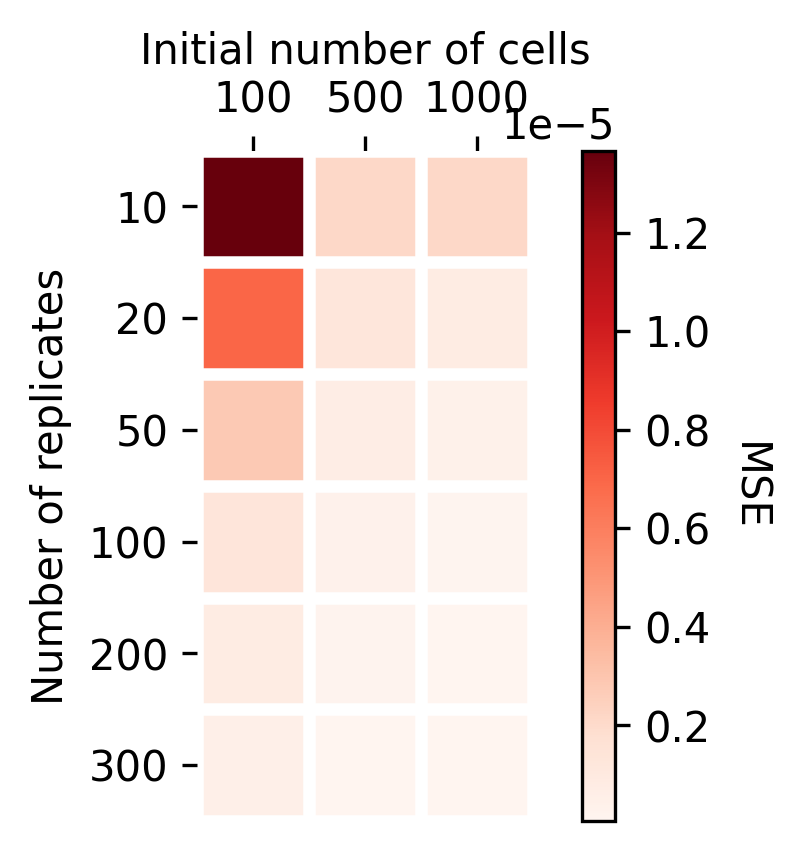

In [29]:
num_time_points = 121

if cycle_model == 0:
    plt.clf()
    fig, ax = plt.subplots(1, 1, figsize = (5.27, 2.96), dpi = 300)
    im, cbar = heatmap(Ki67_negative_csse/num_time_points, num_replicates_labels, number_of_cells_labels, ax=ax, cmap="Reds", cbarlabel='MSE')
    # texts = annotate_heatmap(im, valfmt="{x:.4f}")

    plt.xlabel( "Initial number of cells", size=10 )
    ax.xaxis.set_label_position('top') 
    plt.ylabel( "Number of replicates", size=10 )
    plt.savefig(os.path.join(output_folder, "Ki67_neg_mse.pdf"), bbox_inches = 'tight')
    
    plt.clf()
    fig, ax = plt.subplots(1, 1, figsize = (5.27, 2.96), dpi = 300)
    im, cbar = heatmap(Ki67_positive_premitotic_csse/num_time_points, num_replicates_labels, number_of_cells_labels, ax=ax, cmap="Reds", cbarlabel='MSE')
    # texts = annotate_heatmap(im, valfmt="{x:.4f}")

    plt.xlabel( "Initial number of cells", size=10 )
    ax.xaxis.set_label_position('top') 
    plt.ylabel( "Number of replicates", size=10 )
    plt.savefig(os.path.join(output_folder, "Ki67_pos_pre_mse.pdf"), bbox_inches = 'tight')
    
    plt.clf()
    fig, ax = plt.subplots(1, 1, figsize = (5.27, 2.96), dpi = 300)
    im, cbar = heatmap(Ki67_positive_postmitotic_csse/num_time_points, num_replicates_labels, number_of_cells_labels, ax=ax, cmap="Reds", cbarlabel='MSE')
    # texts = annotate_heatmap(im, valfmt="{x:.4f}")

    plt.xlabel( "Initial number of cells", size=10 )
    ax.xaxis.set_label_position('top') 
    plt.ylabel( "Number of replicates", size=10 )
    plt.savefig(os.path.join(output_folder, "Ki67_pos_post_mse.pdf"), bbox_inches = 'tight')
elif cycle_model == 1:
    plt.clf()
    fig, ax = plt.subplots(1, 1, figsize = (5.27, 2.96), dpi = 300)
    im, cbar = heatmap(Ki67_negative_csse/num_time_points, num_replicates_labels, number_of_cells_labels, ax=ax, cmap="Reds", cbarlabel='MSE')
    # texts = annotate_heatmap(im, valfmt="{x:.4f}")

    plt.xlabel( "Initial number of cells", size=10 )
    ax.xaxis.set_label_position('top') 
    plt.ylabel( "Number of replicates", size=10 )
    plt.savefig(os.path.join(output_folder, "Ki67_neg_mse.pdf"), bbox_inches = 'tight')
    
    plt.clf()
    fig, ax = plt.subplots(1, 1, figsize = (5.27, 2.96), dpi = 300)
    im, cbar = heatmap(Ki67_positive_csse/num_time_points, num_replicates_labels, number_of_cells_labels, ax=ax, cmap="Reds", cbarlabel='MSE')
    # texts = annotate_heatmap(im, valfmt="{x:.4f}")

    plt.xlabel( "Initial number of cells", size=10 )
    ax.xaxis.set_label_position('top') 
    plt.ylabel( "Number of replicates", size=10 )
    plt.savefig(os.path.join(output_folder, "Ki67_pos_mse.pdf"), bbox_inches = 'tight')
    
    # plt.clf()
    # fig, ax = plt.subplots(1, 1, figsize = (5.27, 2.96), dpi = 300)
    # im, cbar = heatmap(tumor_cell_fraction_error, num_replicates_labels, number_of_cells_labels, ax=ax, cmap="Reds", cbarlabel='MSE')
    # # texts = annotate_heatmap(im, valfmt="{x:.4f}")

    # plt.xlabel( "Initial number of cells", size=10 )
    # ax.xaxis.set_label_position('top') 
    # plt.ylabel( "Number of replicates", size=10 )
    # plt.savefig(os.path.join(output_folder, "Ki67_Basic_mse.pdf"), bbox_inches = 'tight')
elif cycle_model == 2:
    plt.clf()
    fig, ax = plt.subplots(1, 1, figsize = (5.27, 2.96), dpi = 300)
    im, cbar = heatmap(G0G1_phase_csse/num_time_points, num_replicates_labels, number_of_cells_labels, ax=ax, cmap="Reds", cbarlabel='MSE')
    # texts = annotate_heatmap(im, valfmt="{x:.4f}")

    plt.xlabel( "Initial number of cells", size=10 )
    ax.xaxis.set_label_position('top') 
    plt.ylabel( "Number of replicates", size=10 )
    plt.savefig(os.path.join(output_folder, "G0G1_phase_mse.pdf"), bbox_inches = 'tight')
    
    plt.clf()
    fig, ax = plt.subplots(1, 1, figsize = (5.27, 2.96), dpi = 300)
    im, cbar = heatmap(S_phase_csse/num_time_points, num_replicates_labels, number_of_cells_labels, ax=ax, cmap="Reds", cbarlabel='MSE')
    # texts = annotate_heatmap(im, valfmt="{x:.4f}")

    plt.xlabel( "Initial number of cells", size=10 )
    ax.xaxis.set_label_position('top') 
    plt.ylabel( "Number of replicates", size=10 )
    plt.savefig(os.path.join(output_folder, "S_phase_mse.pdf"), bbox_inches = 'tight')
    
    plt.clf()
    fig, ax = plt.subplots(1, 1, figsize = (5.27, 2.96), dpi = 300)
    im, cbar = heatmap(G2M_phase_csse/num_time_points, num_replicates_labels, number_of_cells_labels, ax=ax, cmap="Reds", cbarlabel='MSE')
    # texts = annotate_heatmap(im, valfmt="{x:.4f}")

    plt.xlabel( "Initial number of cells", size=10 )
    ax.xaxis.set_label_position('top') 
    plt.ylabel( "Number of replicates", size=10 )
    plt.savefig(os.path.join(output_folder, "G2M_phase_mse.pdf"), bbox_inches = 'tight')
elif cycle_model == 5:
    plt.clf()
    fig, ax = plt.subplots(1, 1, figsize = (5.27, 2.96), dpi = 300)
    im, cbar = heatmap(live_csse/num_time_points, num_replicates_labels, number_of_cells_labels, ax=ax, cmap="Reds", cbarlabel='MSE')
    # texts = annotate_heatmap(im, valfmt="{x:.4f}")

    plt.xlabel( "Initial number of cells", size=10 )
    ax.xaxis.set_label_position('top') 
    plt.ylabel( "Number of replicates", size=10 )
    plt.savefig(os.path.join(output_folder, "live_mse.pdf"), bbox_inches = 'tight')
elif cycle_model == 6:
    plt.clf()
    fig, ax = plt.subplots(1, 1, figsize = (5.27, 2.96), dpi = 300)
    im, cbar = heatmap(G0G1_phase_csse/num_time_points, num_replicates_labels, number_of_cells_labels, ax=ax, cmap="Reds", cbarlabel='MSE')
    # texts = annotate_heatmap(im, valfmt="{x:.4f}")

    plt.xlabel( "Initial number of cells", size=10 )
    ax.xaxis.set_label_position('top') 
    plt.ylabel( "Number of replicates", size=10 )
    plt.savefig(os.path.join(output_folder, "G0G1_phase_mse.pdf"), bbox_inches = 'tight')
    
    plt.clf()
    fig, ax = plt.subplots(1, 1, figsize = (5.27, 2.96), dpi = 300)
    im, cbar = heatmap(S_phase_csse/num_time_points, num_replicates_labels, number_of_cells_labels, ax=ax, cmap="Reds", cbarlabel='MSE')
    # texts = annotate_heatmap(im, valfmt="{x:.4f}")

    plt.xlabel( "Initial number of cells", size=10 )
    ax.xaxis.set_label_position('top') 
    plt.ylabel( "Number of replicates", size=10 )
    plt.savefig(os.path.join(output_folder, "S_phase_mse.pdf"), bbox_inches = 'tight')
    
    plt.clf()
    fig, ax = plt.subplots(1, 1, figsize = (5.27, 2.96), dpi = 300)
    im, cbar = heatmap(G2_phase_csse/num_time_points, num_replicates_labels, number_of_cells_labels, ax=ax, cmap="Reds", cbarlabel='MSE')
    # texts = annotate_heatmap(im, valfmt="{x:.4f}")

    plt.xlabel( "Initial number of cells", size=10 )
    ax.xaxis.set_label_position('top') 
    plt.ylabel( "Number of replicates", size=10 )
    plt.savefig(os.path.join(output_folder, "G2_phase_mse.pdf"), bbox_inches = 'tight')
    
    plt.clf()
    fig, ax = plt.subplots(1, 1, figsize = (5.27, 2.96), dpi = 300)
    im, cbar = heatmap(M_phase_csse/num_time_points, num_replicates_labels, number_of_cells_labels, ax=ax, cmap="Reds", cbarlabel='MSE')
    # texts = annotate_heatmap(im, valfmt="{x:.4f}")

    plt.xlabel( "Initial number of cells", size=10 )
    ax.xaxis.set_label_position('top') 
    plt.ylabel( "Number of replicates", size=10 )
    plt.savefig(os.path.join(output_folder, "M_phase_mse.pdf"), bbox_inches = 'tight')
else:
    print("Unrecognized cell cycle model.")

## Read *absolute_error.csv* files

In [30]:
data = [None] * num_folders
times = [None] * num_folders
if cycle_model == 0:
    Ki67_negative_absolute_error = [None] * num_folders
    Ki67_positive_premitotic_absolute_error = [None] * num_folders
    Ki67_positive_postmitotic_absolute_error = [None] * num_folders
elif cycle_model == 1:
    Ki67_negative_absolute_error = [None] * num_folders
    Ki67_positive_absolute_error = [None] * num_folders
    
    # tumor_cell_fraction_error = [None] * num_folders
elif cycle_model == 2:
    G0G1_phase_absolute_error = [None] * num_folders
    S_phase_absolute_error = [None] * num_folders
    G2M_phase_absolute_error = [None] * num_folders
elif cycle_model == 5:
    live_absolute_error = [None] * num_folders
elif cycle_model == 6:
    G0G1_phase_absolute_error = [None] * num_folders
    S_phase_absolute_error = [None] * num_folders
    G2_phase_absolute_error = [None] * num_folders
    M_phase_absolute_error = [None] * num_folders
else:
    print("Unrecognized cell cycle model.")

for i in range(num_folders):
    data[i] = np.genfromtxt(output_folder + get_folder_name(settings[i,:]) + "absolute_error.csv", dtype = float, delimiter = ',', names = True)
    times[i] = data[i]["times"][-1]
    if cycle_model == 0:
        Ki67_negative_absolute_error[i] = data[i]["Ki67_negative_absolute_error"][-1]
        Ki67_positive_premitotic_absolute_error[i] = data[i]["Ki67_positive_premitotic_absolute_error"][-1]
        Ki67_positive_postmitotic_absolute_error[i] = data[i]["Ki67_positive_postmitotic_absolute_error"][-1]
    elif cycle_model == 1:
        Ki67_negative_absolute_error[i] = data[i]["Ki67_negative_absolute_error"][-1]
        Ki67_positive_absolute_error[i] = data[i]["Ki67_positive_absolute_error"][-1]
        
        # tumor_cell_fraction_error[i] = data[i]["tumor_cell_fraction_error"][-1]
    elif cycle_model == 2:
        G0G1_phase_absolute_error[i] = data[i]["G0G1_phase_absolute_error"][-1]
        S_phase_absolute_error[i] = data[i]["S_phase_absolute_error"][-1]
        G2M_phase_absolute_error[i] = data[i]["G2M_phase_absolute_error"][-1]
    elif cycle_model == 5:
        live_absolute_error[i] = data[i]["live_absolute_error"][-1]
    elif cycle_model == 6:
        G0G1_phase_absolute_error[i] = data[i]["G0G1_phase_absolute_error"][-1]
        S_phase_absolute_error[i] = data[i]["S_phase_absolute_error"][-1]
        G2_phase_absolute_error[i] = data[i]["G2_phase_absolute_error"][-1]
        M_phase_absolute_error[i] = data[i]["M_phase_absolute_error"][-1]
    else:
        print("Unrecognized cell cycle model.")

## Plot heatmap for the errors

In [31]:
if cycle_model == 0:
    Ki67_negative_absolute_error = np.array(Ki67_negative_absolute_error)
    Ki67_positive_premitotic_absolute_error = np.array(Ki67_positive_premitotic_absolute_error)
    Ki67_positive_postmitotic_absolute_error = np.array(Ki67_positive_postmitotic_absolute_error)

    Ki67_negative_absolute_error = Ki67_negative_absolute_error.reshape((len(number_of_cells), len(num_replicates)))
    Ki67_positive_premitotic_absolute_error = Ki67_positive_premitotic_absolute_error.reshape((len(number_of_cells), len(num_replicates)))
    Ki67_positive_postmitotic_absolute_error = Ki67_positive_postmitotic_absolute_error.reshape((len(number_of_cells), len(num_replicates)))

    Ki67_negative_absolute_error = np.transpose(Ki67_negative_absolute_error)
    Ki67_positive_premitotic_absolute_error = np.transpose(Ki67_positive_premitotic_absolute_error)
    Ki67_positive_postmitotic_absolute_error = np.transpose(Ki67_positive_postmitotic_absolute_error)
elif cycle_model == 1:
    Ki67_negative_absolute_error = np.array(Ki67_negative_absolute_error)
    Ki67_positive_absolute_error = np.array(Ki67_positive_absolute_error)
    # tumor_cell_fraction_error = np.array(tumor_cell_fraction_error)

    Ki67_negative_absolute_error = Ki67_negative_absolute_error.reshape((len(number_of_cells), len(num_replicates)))
    Ki67_positive_absolute_error = Ki67_positive_absolute_error.reshape((len(number_of_cells), len(num_replicates)))
    # tumor_cell_fraction_error = tumor_cell_fraction_error.reshape((len(number_of_cells), len(num_replicates)))

    Ki67_negative_absolute_error = np.transpose(Ki67_negative_absolute_error)
    Ki67_positive_absolute_error = np.transpose(Ki67_positive_absolute_error)
    # tumor_cell_fraction_error = np.transpose(tumor_cell_fraction_error)
elif cycle_model == 2:
    G0G1_phase_absolute_error = np.array(G0G1_phase_absolute_error)
    S_phase_absolute_error = np.array(S_phase_absolute_error)
    G2M_phase_absolute_error = np.array(G2M_phase_absolute_error)

    G0G1_phase_absolute_error = G0G1_phase_absolute_error.reshape((len(number_of_cells), len(num_replicates)))
    S_phase_absolute_error = S_phase_absolute_error.reshape((len(number_of_cells), len(num_replicates)))
    G2M_phase_absolute_error = G2M_phase_absolute_error.reshape((len(number_of_cells), len(num_replicates)))

    G0G1_phase_absolute_error = np.transpose(G0G1_phase_absolute_error)
    S_phase_absolute_error = np.transpose(S_phase_absolute_error)
    G2M_phase_absolute_error = np.transpose(G2M_phase_absolute_error)
elif cycle_model == 5:
    live_absolute_error = np.array(live_absolute_error)

    live_absolute_error = live_absolute_error.reshape((len(number_of_cells), len(num_replicates)))

    live_absolute_error = np.transpose(live_absolute_error)
elif cycle_model == 6:
    G0G1_phase_absolute_error = np.array(G0G1_phase_absolute_error)
    S_phase_absolute_error = np.array(S_phase_absolute_error)
    G2_phase_absolute_error = np.array(G2_phase_absolute_error)
    M_phase_absolute_error = np.array(M_phase_absolute_error)

    G0G1_phase_absolute_error = G0G1_phase_absolute_error.reshape((len(number_of_cells), len(num_replicates)))
    S_phase_absolute_error = S_phase_absolute_error.reshape((len(number_of_cells), len(num_replicates)))
    G2_phase_absolute_error = G2_phase_absolute_error.reshape((len(number_of_cells), len(num_replicates)))
    M_phase_absolute_error = M_phase_absolute_error.reshape((len(number_of_cells), len(num_replicates)))

    G0G1_phase_absolute_error = np.transpose(G0G1_phase_absolute_error)
    S_phase_absolute_error = np.transpose(S_phase_absolute_error)
    G2_phase_absolute_error = np.transpose(G2_phase_absolute_error)
    M_phase_absolute_error = np.transpose(M_phase_absolute_error)
else:
    print("Unrecognized cell cycle model.")

<Figure size 432x288 with 0 Axes>

<Figure size 1581x888 with 0 Axes>

<Figure size 1581x888 with 0 Axes>

<Figure size 1581x888 with 0 Axes>

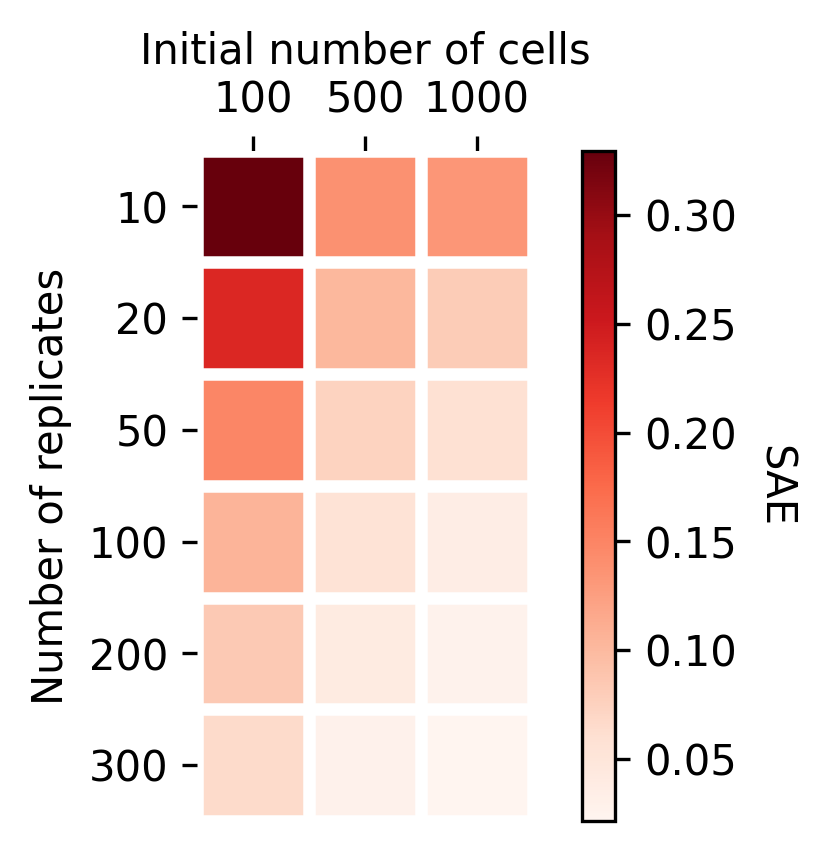

In [32]:
if cycle_model == 0:
    plt.clf()
    fig, ax = plt.subplots(1, 1, figsize = (5.27, 2.96), dpi = 300)
    im, cbar = heatmap(Ki67_negative_absolute_error, num_replicates_labels, number_of_cells_labels, ax=ax, cmap="Reds", cbarlabel='SAE')
    # texts = annotate_heatmap(im, valfmt="{x:.4f}")

    plt.xlabel( "Initial number of cells", size=10 )
    ax.xaxis.set_label_position('top') 
    plt.ylabel( "Number of replicates", size=10 )
    plt.savefig(os.path.join(output_folder, "Ki67_neg_abs.pdf"), bbox_inches = 'tight')
    
    plt.clf()
    fig, ax = plt.subplots(1, 1, figsize = (5.27, 2.96), dpi = 300)
    im, cbar = heatmap(Ki67_positive_premitotic_absolute_error, num_replicates_labels, number_of_cells_labels, ax=ax, cmap="Reds", cbarlabel='SAE')
    # texts = annotate_heatmap(im, valfmt="{x:.4f}")

    plt.xlabel( "Initial number of cells", size=10 )
    ax.xaxis.set_label_position('top') 
    plt.ylabel( "Number of replicates", size=10 )
    plt.savefig(os.path.join(output_folder, "Ki67_pos_pre_abs.pdf"), bbox_inches = 'tight')
    
    plt.clf()
    fig, ax = plt.subplots(1, 1, figsize = (5.27, 2.96), dpi = 300)
    im, cbar = heatmap(Ki67_positive_postmitotic_absolute_error, num_replicates_labels, number_of_cells_labels, ax=ax, cmap="Reds", cbarlabel='SAE')
    # texts = annotate_heatmap(im, valfmt="{x:.4f}")

    plt.xlabel( "Initial number of cells", size=10 )
    ax.xaxis.set_label_position('top') 
    plt.ylabel( "Number of replicates", size=10 )
    plt.savefig(os.path.join(output_folder, "Ki67_pos_post_abs.pdf"), bbox_inches = 'tight')
elif cycle_model == 1:
    plt.clf()
    fig, ax = plt.subplots(1, 1, figsize = (5.27, 2.96), dpi = 300)
    im, cbar = heatmap(Ki67_negative_absolute_error, num_replicates_labels, number_of_cells_labels, ax=ax, cmap="Reds", cbarlabel='SAE')
    # texts = annotate_heatmap(im, valfmt="{x:.4f}")

    plt.xlabel( "Initial number of cells", size=10 )
    ax.xaxis.set_label_position('top') 
    plt.ylabel( "Number of replicates", size=10 )
    plt.savefig(os.path.join(output_folder, "Ki67_neg_abs.pdf"), bbox_inches = 'tight')
    
    plt.clf()
    fig, ax = plt.subplots(1, 1, figsize = (5.27, 2.96), dpi = 300)
    im, cbar = heatmap(Ki67_positive_absolute_error, num_replicates_labels, number_of_cells_labels, ax=ax, cmap="Reds", cbarlabel='SAE')
    # texts = annotate_heatmap(im, valfmt="{x:.4f}")

    plt.xlabel( "Initial number of cells", size=10 )
    ax.xaxis.set_label_position('top') 
    plt.ylabel( "Number of replicates", size=10 )
    plt.savefig(os.path.join(output_folder, "Ki67_pos_abs.pdf"), bbox_inches = 'tight')
    
    # plt.clf()
    # fig, ax = plt.subplots(1, 1, figsize = (5.27, 2.96), dpi = 300)
    # im, cbar = heatmap(tumor_cell_fraction_error, num_replicates_labels, number_of_cells_labels, ax=ax, cmap="Reds", cbarlabel='SAE')
    # # texts = annotate_heatmap(im, valfmt="{x:.4f}")

    # plt.xlabel( "Initial number of cells", size=10 )
    # ax.xaxis.set_label_position('top') 
    # plt.ylabel( "Number of replicates", size=10 )
    # plt.savefig(os.path.join(output_folder, "Ki67_Basic_abs.pdf"), bbox_inches = 'tight')
elif cycle_model == 2:
    plt.clf()
    fig, ax = plt.subplots(1, 1, figsize = (5.27, 2.96), dpi = 300)
    im, cbar = heatmap(G0G1_phase_absolute_error, num_replicates_labels, number_of_cells_labels, ax=ax, cmap="Reds", cbarlabel='SAE')
    # texts = annotate_heatmap(im, valfmt="{x:.4f}")

    plt.xlabel( "Initial number of cells", size=10 )
    ax.xaxis.set_label_position('top') 
    plt.ylabel( "Number of replicates", size=10 )
    plt.savefig(os.path.join(output_folder, "G0G1_phase_abs.pdf"), bbox_inches = 'tight')
    
    plt.clf()
    fig, ax = plt.subplots(1, 1, figsize = (5.27, 2.96), dpi = 300)
    im, cbar = heatmap(S_phase_absolute_error, num_replicates_labels, number_of_cells_labels, ax=ax, cmap="Reds", cbarlabel='SAE')
    # texts = annotate_heatmap(im, valfmt="{x:.4f}")

    plt.xlabel( "Initial number of cells", size=10 )
    ax.xaxis.set_label_position('top') 
    plt.ylabel( "Number of replicates", size=10 )
    plt.savefig(os.path.join(output_folder, "S_phase_abs.pdf"), bbox_inches = 'tight')
    
    plt.clf()
    fig, ax = plt.subplots(1, 1, figsize = (5.27, 2.96), dpi = 300)
    im, cbar = heatmap(G2M_phase_absolute_error, num_replicates_labels, number_of_cells_labels, ax=ax, cmap="Reds", cbarlabel='SAE')
    # texts = annotate_heatmap(im, valfmt="{x:.4f}")

    plt.xlabel( "Initial number of cells", size=10 )
    ax.xaxis.set_label_position('top') 
    plt.ylabel( "Number of replicates", size=10 )
    plt.savefig(os.path.join(output_folder, "G2M_phase_abs.pdf"), bbox_inches = 'tight')
elif cycle_model == 5:
    plt.clf()
    fig, ax = plt.subplots(1, 1, figsize = (5.27, 2.96), dpi = 300)
    im, cbar = heatmap(live_absolute_error, num_replicates_labels, number_of_cells_labels, ax=ax, cmap="Reds", cbarlabel='SAE')
    # texts = annotate_heatmap(im, valfmt="{x:.4f}")

    plt.xlabel( "Initial number of cells", size=10 )
    ax.xaxis.set_label_position('top') 
    plt.ylabel( "Number of replicates", size=10 )
    plt.savefig(os.path.join(output_folder, "live_abs.pdf"), bbox_inches = 'tight')
elif cycle_model == 6:
    plt.clf()
    fig, ax = plt.subplots(1, 1, figsize = (5.27, 2.96), dpi = 300)
    im, cbar = heatmap(G0G1_phase_absolute_error, num_replicates_labels, number_of_cells_labels, ax=ax, cmap="Reds", cbarlabel='SAE')
    # texts = annotate_heatmap(im, valfmt="{x:.4f}")

    plt.xlabel( "Initial number of cells", size=10 )
    ax.xaxis.set_label_position('top') 
    plt.ylabel( "Number of replicates", size=10 )
    plt.savefig(os.path.join(output_folder, "G0G1_phase_abs.pdf"), bbox_inches = 'tight')
    
    plt.clf()
    fig, ax = plt.subplots(1, 1, figsize = (5.27, 2.96), dpi = 300)
    im, cbar = heatmap(S_phase_absolute_error, num_replicates_labels, number_of_cells_labels, ax=ax, cmap="Reds", cbarlabel='SAE')
    # texts = annotate_heatmap(im, valfmt="{x:.4f}")

    plt.xlabel( "Initial number of cells", size=10 )
    ax.xaxis.set_label_position('top') 
    plt.ylabel( "Number of replicates", size=10 )
    plt.savefig(os.path.join(output_folder, "S_phase_abs.pdf"), bbox_inches = 'tight')
    
    plt.clf()
    fig, ax = plt.subplots(1, 1, figsize = (5.27, 2.96), dpi = 300)
    im, cbar = heatmap(G2_phase_absolute_error, num_replicates_labels, number_of_cells_labels, ax=ax, cmap="Reds", cbarlabel='SAE')
    # texts = annotate_heatmap(im, valfmt="{x:.4f}")

    plt.xlabel( "Initial number of cells", size=10 )
    ax.xaxis.set_label_position('top') 
    plt.ylabel( "Number of replicates", size=10 )
    plt.savefig(os.path.join(output_folder, "G2_phase_abs.pdf"), bbox_inches = 'tight')
    
    plt.clf()
    fig, ax = plt.subplots(1, 1, figsize = (5.27, 2.96), dpi = 300)
    im, cbar = heatmap(M_phase_absolute_error, num_replicates_labels, number_of_cells_labels, ax=ax, cmap="Reds", cbarlabel='SAE')
    # texts = annotate_heatmap(im, valfmt="{x:.4f}")

    plt.xlabel( "Initial number of cells", size=10 )
    ax.xaxis.set_label_position('top') 
    plt.ylabel( "Number of replicates", size=10 )
    plt.savefig(os.path.join(output_folder, "M_phase_abs.pdf"), bbox_inches = 'tight')
else:
    print("Unrecognized cell cycle model.")

<Figure size 432x288 with 0 Axes>

<Figure size 1581x888 with 0 Axes>

<Figure size 1581x888 with 0 Axes>

<Figure size 1581x888 with 0 Axes>

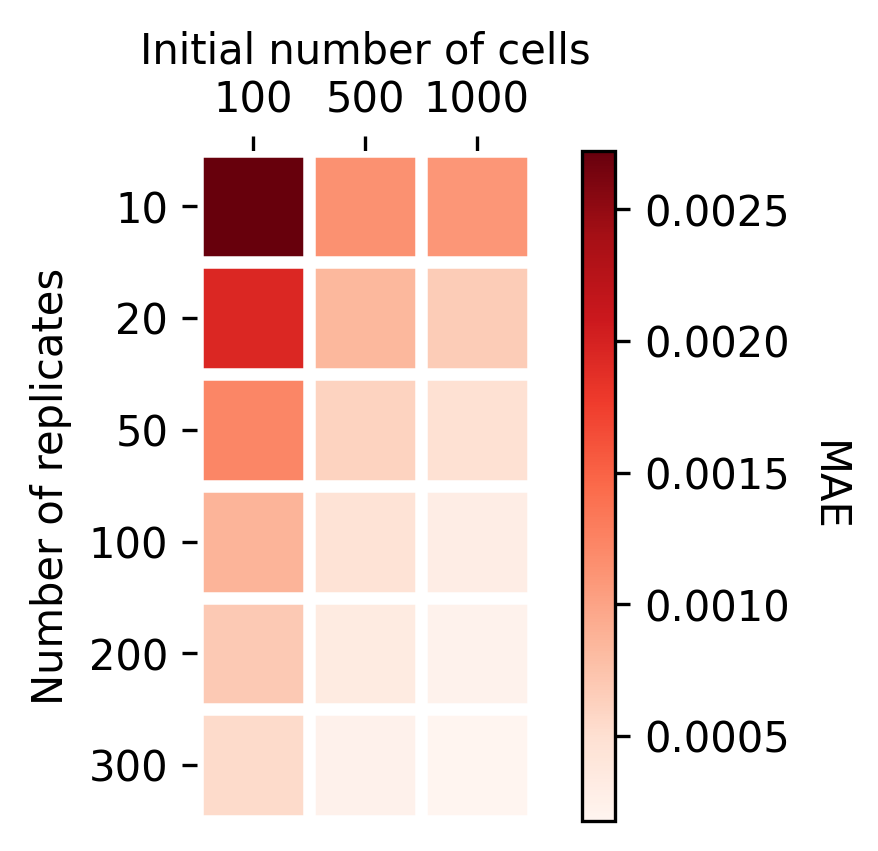

In [33]:
if cycle_model == 0:
    plt.clf()
    fig, ax = plt.subplots(1, 1, figsize = (5.27, 2.96), dpi = 300)
    im, cbar = heatmap(Ki67_negative_absolute_error/num_time_points, num_replicates_labels, number_of_cells_labels, ax=ax, cmap="Reds", cbarlabel='MAE')
    # texts = annotate_heatmap(im, valfmt="{x:.4f}")

    plt.xlabel( "Initial number of cells", size=10 )
    ax.xaxis.set_label_position('top') 
    plt.ylabel( "Number of replicates", size=10 )
    plt.savefig(os.path.join(output_folder, "Ki67_neg_mae.pdf"), bbox_inches = 'tight')
    
    plt.clf()
    fig, ax = plt.subplots(1, 1, figsize = (5.27, 2.96), dpi = 300)
    im, cbar = heatmap(Ki67_positive_premitotic_absolute_error/num_time_points, num_replicates_labels, number_of_cells_labels, ax=ax, cmap="Reds", cbarlabel='MAE')
    # texts = annotate_heatmap(im, valfmt="{x:.4f}")

    plt.xlabel( "Initial number of cells", size=10 )
    ax.xaxis.set_label_position('top') 
    plt.ylabel( "Number of replicates", size=10 )
    plt.savefig(os.path.join(output_folder, "Ki67_pos_pre_mae.pdf"), bbox_inches = 'tight')
    
    plt.clf()
    fig, ax = plt.subplots(1, 1, figsize = (5.27, 2.96), dpi = 300)
    im, cbar = heatmap(Ki67_positive_postmitotic_absolute_error/num_time_points, num_replicates_labels, number_of_cells_labels, ax=ax, cmap="Reds", cbarlabel='MAE')
    # texts = annotate_heatmap(im, valfmt="{x:.4f}")

    plt.xlabel( "Initial number of cells", size=10 )
    ax.xaxis.set_label_position('top') 
    plt.ylabel( "Number of replicates", size=10 )
    plt.savefig(os.path.join(output_folder, "Ki67_pos_post_mae.pdf"), bbox_inches = 'tight')
elif cycle_model == 1:
    plt.clf()
    fig, ax = plt.subplots(1, 1, figsize = (5.27, 2.96), dpi = 300)
    im, cbar = heatmap(Ki67_negative_absolute_error/num_time_points, num_replicates_labels, number_of_cells_labels, ax=ax, cmap="Reds", cbarlabel='MAE')
    # texts = annotate_heatmap(im, valfmt="{x:.4f}")

    plt.xlabel( "Initial number of cells", size=10 )
    ax.xaxis.set_label_position('top') 
    plt.ylabel( "Number of replicates", size=10 )
    plt.savefig(os.path.join(output_folder, "Ki67_neg_mae.pdf"), bbox_inches = 'tight')
    
    plt.clf()
    fig, ax = plt.subplots(1, 1, figsize = (5.27, 2.96), dpi = 300)
    im, cbar = heatmap(Ki67_positive_absolute_error/num_time_points, num_replicates_labels, number_of_cells_labels, ax=ax, cmap="Reds", cbarlabel='MAE')
    # texts = annotate_heatmap(im, valfmt="{x:.4f}")

    plt.xlabel( "Initial number of cells", size=10 )
    ax.xaxis.set_label_position('top') 
    plt.ylabel( "Number of replicates", size=10 )
    plt.savefig(os.path.join(output_folder, "Ki67_pos_mae.pdf"), bbox_inches = 'tight')
    
    # plt.clf()
    # fig, ax = plt.subplots(1, 1, figsize = (5.27, 2.96), dpi = 300)
    # im, cbar = heatmap(tumor_cell_fraction_error, num_replicates_labels, number_of_cells_labels, ax=ax, cmap="Reds", cbarlabel='MAE')
    # # texts = annotate_heatmap(im, valfmt="{x:.4f}")

    # plt.xlabel( "Initial number of cells", size=10 )
    # ax.xaxis.set_label_position('top') 
    # plt.ylabel( "Number of replicates", size=10 )
    # plt.savefig(os.path.join(output_folder, "Ki67_Basic_mae.pdf"), bbox_inches = 'tight')
elif cycle_model == 2:
    plt.clf()
    fig, ax = plt.subplots(1, 1, figsize = (5.27, 2.96), dpi = 300)
    im, cbar = heatmap(G0G1_phase_absolute_error/num_time_points, num_replicates_labels, number_of_cells_labels, ax=ax, cmap="Reds", cbarlabel='MAE')
    # texts = annotate_heatmap(im, valfmt="{x:.4f}")

    plt.xlabel( "Initial number of cells", size=10 )
    ax.xaxis.set_label_position('top') 
    plt.ylabel( "Number of replicates", size=10 )
    plt.savefig(os.path.join(output_folder, "G0G1_phase_mae.pdf"), bbox_inches = 'tight')
    
    plt.clf()
    fig, ax = plt.subplots(1, 1, figsize = (5.27, 2.96), dpi = 300)
    im, cbar = heatmap(S_phase_absolute_error/num_time_points, num_replicates_labels, number_of_cells_labels, ax=ax, cmap="Reds", cbarlabel='MAE')
    # texts = annotate_heatmap(im, valfmt="{x:.4f}")

    plt.xlabel( "Initial number of cells", size=10 )
    ax.xaxis.set_label_position('top') 
    plt.ylabel( "Number of replicates", size=10 )
    plt.savefig(os.path.join(output_folder, "S_phase_mae.pdf"), bbox_inches = 'tight')
    
    plt.clf()
    fig, ax = plt.subplots(1, 1, figsize = (5.27, 2.96), dpi = 300)
    im, cbar = heatmap(G2M_phase_absolute_error/num_time_points, num_replicates_labels, number_of_cells_labels, ax=ax, cmap="Reds", cbarlabel='MAE')
    # texts = annotate_heatmap(im, valfmt="{x:.4f}")

    plt.xlabel( "Initial number of cells", size=10 )
    ax.xaxis.set_label_position('top') 
    plt.ylabel( "Number of replicates", size=10 )
    plt.savefig(os.path.join(output_folder, "G2M_phase_mae.pdf"), bbox_inches = 'tight')
elif cycle_model == 5:
    plt.clf()
    fig, ax = plt.subplots(1, 1, figsize = (5.27, 2.96), dpi = 300)
    im, cbar = heatmap(live_absolute_error/num_time_points, num_replicates_labels, number_of_cells_labels, ax=ax, cmap="Reds", cbarlabel='MAE')
    # texts = annotate_heatmap(im, valfmt="{x:.4f}")

    plt.xlabel( "Initial number of cells", size=10 )
    ax.xaxis.set_label_position('top') 
    plt.ylabel( "Number of replicates", size=10 )
    plt.savefig(os.path.join(output_folder, "live_mae.pdf"), bbox_inches = 'tight')
elif cycle_model == 6:
    plt.clf()
    fig, ax = plt.subplots(1, 1, figsize = (5.27, 2.96), dpi = 300)
    im, cbar = heatmap(G0G1_phase_absolute_error/num_time_points, num_replicates_labels, number_of_cells_labels, ax=ax, cmap="Reds", cbarlabel='MAE')
    # texts = annotate_heatmap(im, valfmt="{x:.4f}")

    plt.xlabel( "Initial number of cells", size=10 )
    ax.xaxis.set_label_position('top') 
    plt.ylabel( "Number of replicates", size=10 )
    plt.savefig(os.path.join(output_folder, "G0G1_phase_mae.pdf"), bbox_inches = 'tight')
    
    plt.clf()
    fig, ax = plt.subplots(1, 1, figsize = (5.27, 2.96), dpi = 300)
    im, cbar = heatmap(S_phase_absolute_error/num_time_points, num_replicates_labels, number_of_cells_labels, ax=ax, cmap="Reds", cbarlabel='MAE')
    # texts = annotate_heatmap(im, valfmt="{x:.4f}")

    plt.xlabel( "Initial number of cells", size=10 )
    ax.xaxis.set_label_position('top') 
    plt.ylabel( "Number of replicates", size=10 )
    plt.savefig(os.path.join(output_folder, "S_phase_mae.pdf"), bbox_inches = 'tight')
    
    plt.clf()
    fig, ax = plt.subplots(1, 1, figsize = (5.27, 2.96), dpi = 300)
    im, cbar = heatmap(G2_phase_absolute_error/num_time_points, num_replicates_labels, number_of_cells_labels, ax=ax, cmap="Reds", cbarlabel='MAE')
    # texts = annotate_heatmap(im, valfmt="{x:.4f}")

    plt.xlabel( "Initial number of cells", size=10 )
    ax.xaxis.set_label_position('top') 
    plt.ylabel( "Number of replicates", size=10 )
    plt.savefig(os.path.join(output_folder, "G2_phase_mae.pdf"), bbox_inches = 'tight')
    
    plt.clf()
    fig, ax = plt.subplots(1, 1, figsize = (5.27, 2.96), dpi = 300)
    im, cbar = heatmap(M_phase_absolute_error/num_time_points, num_replicates_labels, number_of_cells_labels, ax=ax, cmap="Reds", cbarlabel='MAE')
    # texts = annotate_heatmap(im, valfmt="{x:.4f}")

    plt.xlabel( "Initial number of cells", size=10 )
    ax.xaxis.set_label_position('top') 
    plt.ylabel( "Number of replicates", size=10 )
    plt.savefig(os.path.join(output_folder, "M_phase_mae.pdf"), bbox_inches = 'tight')
else:
    print("Unrecognized cell cycle model.")